<span style="font-size: 14pt">EREVAN, May-June 2017</span>

<span style="font-size: 16pt"> HW #4: ARIMA model

<span style="color:blue; font-size: 12pt">Alexey Romanenko </span>,
<span style="color:blue; font-size: 12pt; font-family: 'Verdana'">alexromsput@gmail.com</span>


<h1 align="center"> Home Work 4 </h1>

Realize Box-Cox transformation

As you've seen in seminar 5 boxcox transformation from scipy does not work well.
It's suggested to realize method for searching optimal $\lambda$ for boxcox transformation.
Approach for finding the optimal $\lambda$ is descibed <a href="file:///C:/Users/rusrom/Downloads/Guerrero_JoF1993.pdf">here</a>.  

You need to replace all 'TODO' below by some code:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class boxcox():
    def __init__(self, lmbda=None, shift=0):
        '''
    Box Cox Transforms
    Transforms data are to be normal. Also known as power transform.
    
    Parameters
        ----------
    lmbda: float or None
        lmbda the power parameter. The None input automatically calculates
        lmbda based on method guerrero
    shift: float
        Use to normalize data by shifting data to all positive values
        
        '''
        self.lmbda = lmbda
        self.shift = shift
        self.y = []
        self.method = 'guerrero'
        
    def transform(self, x, n=2):
        '''
            x: time series
            n: number of subseries with constant dispersion
        '''
        x = 1.0*np.asarray(x)
        
        if self.shift>0:
            x=  x + self.shift
            
        if self.lmbda is None:
            self.lmbda = 0
            
        if self.lmbda == 0:
            self.y = np.log(x)
        else:
            self.y = (np.power(x, self.lmbda) - 1) / self.lmbda
        return self.y, self.lmbda
        
    def optimal_lambda(self,x, n=2):
        """
        Parameters
        ----------
        x - time series with different variance through the time
        n - number of subseries in x, each subseries x_i has constant variance sigma_i and constant mean m_i
        The method states, that optimal lambda should be chosen in such a way that
         
         sigma_i/(m_i)**(1-lambda) = constant, for all i=1,...,n
        
        you need to find solution for the follow Regression problem:
        
        log(sigma_i) = w_1 + w_2*log(m_i), where
        w_2 = 1-lambda
        
        """
        x = 1.0*np.asarray(x)

        r = int(len(x)/n)  # the length of each subseries
        ps = np.arange(0, len(x), r)
        ps[-1] = len(x) - 1

        
        sigma = np.ones(len(ps) - 1).T
        m = np.ones(shape=(len(ps) - 1, 2))
        
        for i in range(1, len(ps)):
            t = x[ps[i - 1]: ps[i]]
            m     [i - 1][1] = np.log(np.mean(t))
            sigma [i - 1]    = np.log( np.std(t))
        
        w = np.dot(np.linalg.inv(np.dot(m.T,
                                        m)
                                ) 
                   ,np.dot(m.T, 
                           sigma)
                  )
        
        self.lmbda = 1 - w[1]
        
        return self.lmbda

    def inverse(self, y=None):
        """
        Parameters
        ----------
        y: time series

        Returns
        -------
        x: inverse transformed ts
    
        """
        if y is None:
            y = self.y
        
        if self.lmbda == 0:
            x = np.exp(y)
        else:
            x = np.power(self.lmbda * y + 1, 1./self.lmbda)
        return x        

## Check your solution on wage data

In [3]:
# boxcox for wage dataset 
import pandas as pd
%matplotlib inline
ts_wage = pd.read_csv('./data/monthly-wage.csv', sep=';', decimal='.', parse_dates=True, index_col='Month')

/home/david/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  


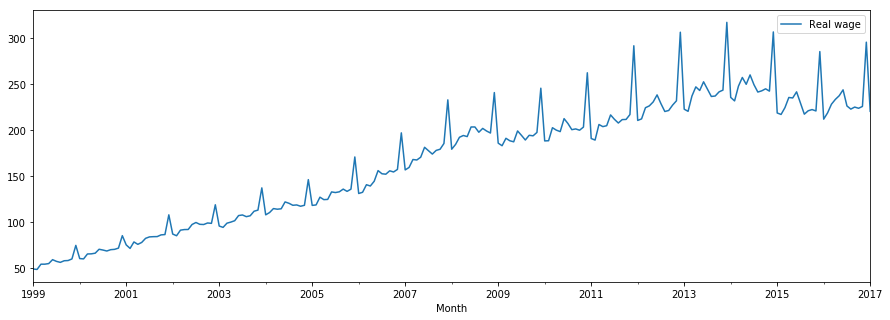

In [4]:
# cut first steps
ts_wage = ts_wage.ix['01.01.1999':'01.01.2017']
ts_wage.plot(figsize=(15,5))

lambda= 0


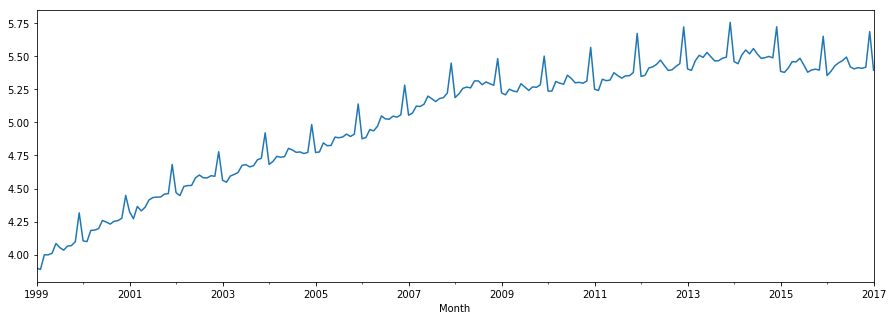

In [5]:
bc = boxcox()
ts_wage['wage_boxcox'], lmbda = bc.transform(ts_wage['Real wage'],n=18)
print('lambda=', lmbda)
ts_wage['wage_boxcox'].plot(figsize=(15,5))

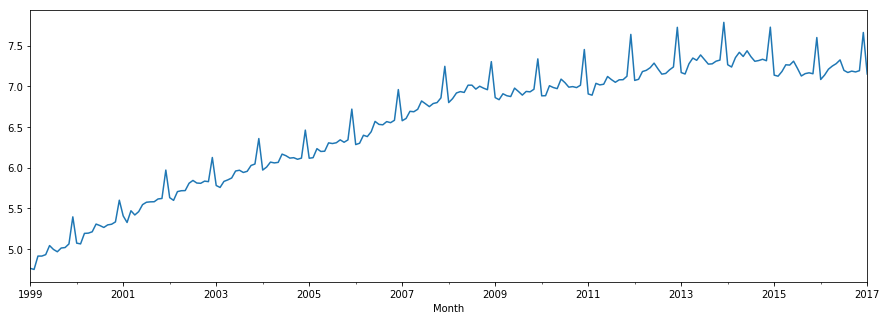

In [6]:
# now it's clear that optimal lambda is close to 0
bc = boxcox(lmbda=0.1)
ts_wage['wage_boxcox'] = bc.transform(ts_wage['Real wage'])[0]
ts_wage['wage_boxcox'].plot(figsize=(15,5))

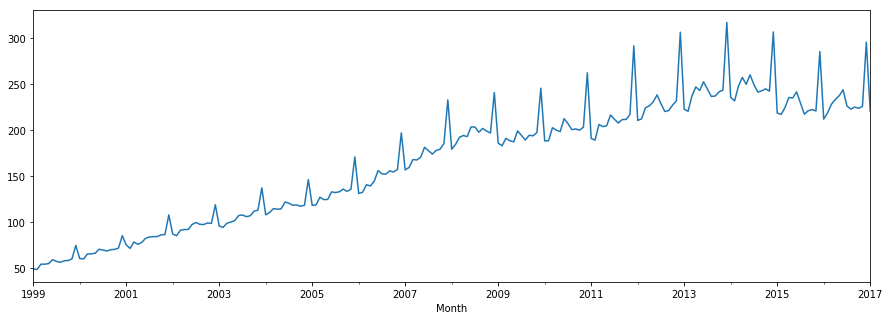

In [7]:
ts_wage['inverse'] = bc.inverse()
ts_wage['inverse'].plot(figsize=(15, 5))

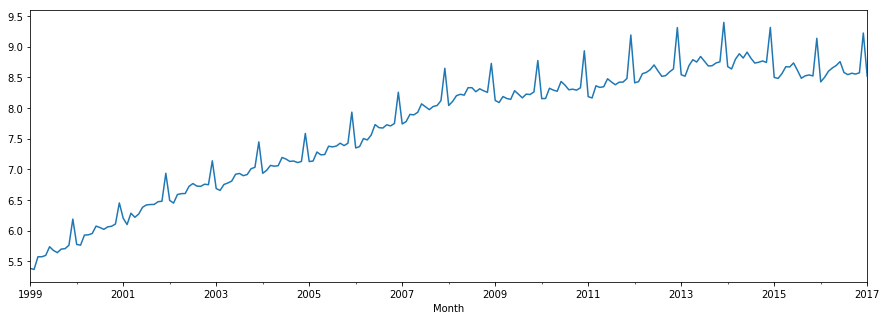

In [8]:
bc = boxcox()
bc.optimal_lambda(ts_wage['Real wage'], n=10)
ts_wage['wage_boxcox'] = bc.transform(ts_wage['Real wage'])[0]
ts_wage['wage_boxcox'].plot(figsize=(15,5))